# 기본설정

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# # 한글 폰트 설치
# !sudo apt-get update -qq
# !sudo apt-get install fonts-nanum* -qq

[sudo] password for user: 
^C
[sudo] password for user: 

In [2]:
# 설치된 폰트 확인
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 설치된 NanumGothic 폰트의 경로 확인
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트를 Matplotlib에 등록
font = fm.FontProperties(fname=fontpath)
fm.fontManager.addfont(fontpath)

# 한글 폰트를 기본 폰트로 설정
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)  # 마이너스 기호 깨짐 방지

In [3]:
# 폰트 캐시 삭제 (필요 시)
matplotlib_cache_dir = os.path.expanduser('~/.cache/matplotlib')
if os.path.exists(matplotlib_cache_dir):
    import shutil
    shutil.rmtree(matplotlib_cache_dir)

# 🛳️ 타이타닉 데이터로 데이터 분석 이해
- Pandas
    - python 기반의 데이터 조작 및 분석 라이브러리
    - 구조화된 데이터 처리를 위한 고성능 함수와 자료구조 제공
    - DataFrame을 중심으로 사용
    - Matplotlib, Seabon등 시각화 도구와 함께 사용

- Pandas로 할 수 있는 일
    - 결측치 처리와 필터링 / 데이터의 추가와 삭제
    - 열 데이터의 정렬과 다양한 데이터 조작
    - 파이썬 리스트, 딕셔너리, 넘파이 배열 또는 csv , 엑셀등 데이터를 데이터프레임으로 쉽게 변환
    - 데이터프레임의 각 필드들 사이의 상관관계를 구하는 일
    - Matplotlib와 결합하여 쉽게 데이터 시각화



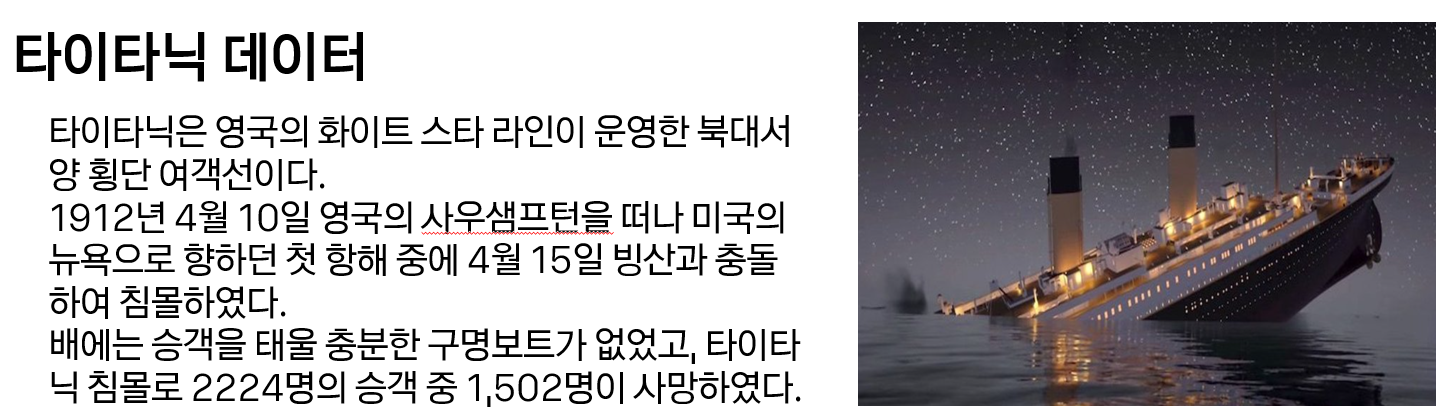

## 데이터 속성 확인하기
- survival 생존 0 = 아니오, 1 = 예

- pclass 티켓 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)

- sex 성별

- Age 나이 (세)

- sibsp 타이타닉호에 탑승한 형제자매/배우자의 수

- parch 타이타닉호에 탑승한 부모/자녀의 수

- ticket 티켓 번호

- fare 승객 운임(요금)

- cabin 선실 번호

- embarked 탑승 항구 (C = 쉐부르, Q = 퀸스타운, S = 사우스햄톤)

- There are 4 numerical (quantitative) features and 4 categorical (qualititive) features.
- Numerical features include 2 continuous features and 2 discrete features.
    - Continuous(연속형 변수): *Age, Fare*
    - Discrete(이산형변수): *SibSp(형제자매, 배우자), Parch*(탑승한 부모, 자녀)
- Categorical features include 3 nominal features and 1 ordinal features.
    - Nominal(명목형): 순서없음(설명, 국가, 색상) -> *Survived, Sex, Embarked*
    - Ordinal(순서형): 순서 있음(예: 학년, 만족도, 등급) -> *Pclass*

## 📂 데이터 불러오기 (타이타닉)

- pandas는 다양한 형태의 데이터를 불러오기 위해 read_XXX 함수를 사용
- read_csv(), read_excel(), read_html(), read_json()등
    - 변수 = pd.read_csv('파일경로', 옵션)
- CSV(Comma-Separated Values)는 쉼표(,) 를 구분자(delimiter)로 사용해
표 형식(tabular) 데이터를 저장·교환하는 가장 기본적인 텍스트 파일 형식
    - 엑셀과 같은 스프레드시트 프로그램이나 데이터 분석 도구에서 널리 활용됨

In [4]:
# 분석할 데이터 코랩에 업로드
# from google.colab import files
# filename = list(files.upload().keys())[0]

filename = "data/titanic.csv"

### pandas 모듈 import

In [5]:
# pandas 모듈 임포트트
import pandas as pd

In [6]:
# 1. 데이터 불러오기
df = pd.read_csv(filename)

## 데이터 살펴 보기

- 데이터셋 구조 파악

    - 데이터 확인(head(), tail(), sample())
    - 컬럼(변수) 및 행(샘플) 파악: 몇 개의 컬럼이 있고, 각 컬럼은 어떤 의미를 가지는지 살펴봅니다.

    - 데이터 타입 점검: 수치형(정수·실수), 범주형(문자열·카테고리), 날짜형 등으로 분류하여, 이후 처리 방식을 결정합니다.

- 기본 통계량 확인

    - describe() 같은 함수를 이용해 평균, 중앙값, 최솟값·최댓값, 사분위수, 표준편차 등을 출력해 보고, 변수별 분포 대략을 짐작합니다.

    - 범주형 변수는 value_counts()로 각 범주별 빈도를 확인합니다.

### 데이터셋 구조 파악

In [7]:
# 상위 n 개의 데이터 보기
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# 하위 n개의 데이터 보기
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# 무작위 샘플 데이터 보기
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
561,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S


In [11]:
# 데이터프레임을 구성하는 행과 열의 크기
# 전체적인 구조, 데이터 타입, 결측치를 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# 데이터 프레임의 크기 (행과 열)
df.shape

(891, 12)

In [14]:
# 데이터프레임의 컬럼 정보
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# 데이터프레임의 인덱스 정보 확인
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# 컬럼들의 데이터 타입 확인하기


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### 통계정보 확인하기

- 기본 통계량 확인

    - describe() 같은 함수를 이용해 평균, 중앙값, 최솟값·최댓값, 사분위수, 표준편차 등을 출력해 보고, 변수별 분포 대략을 짐작합니다.
        - count: 각 열에 있는 값의 개수입니다. 결측치(비어 있는 값)는 제외하고 계산합니다.
        - mean: 각 열의 평균값입니다.
        - std: 각 열의 표준편차입니다. 데이터가 평균에서 얼마나 퍼져 있는지를 나타냅니다.
        - min: 각 열의 최소값입니다.
        - 25%: 각 열에서 하위 25%에 해당하는 값입니다.
        - 50%: 각 열의 중앙값입니다. 데이터를 오름차순/내림차순으로 정렬했을 때 중앙에 위치하는 값을 의미합니다.
        - 75%: 각 열에서 상위 25%에 해당하는 값입니다.
        - max: 각 열의 최대값입니다.

    - 범주형 변수는 value_counts()로 각 범주별 빈도를 확인합니다.

In [ ]:
# 통계 정보 확인하기
# 데이터 컬럼 별 요약 통계량을 나타낸다



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# 통계정보를 transpose(전치)로 행과 열을 뒤바꿔준다
# 각 열(column)의 통계 정보다 행 단위로 정리되어 보기 좋게 바뀐다
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
# 범주형 데이터 통계요약 (include= 'object' 옵션 사용)


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [19]:
# 탑승 요금(Fare)의 합계(sum)
df["Fare"].sum()

28693.9493

In [20]:
# 탑승 요금의 평균 구하기(mean)
df["Fare"].mean()

32.204207968574636

In [21]:
# 탑승 요금의 최대값 구하기 (max)
df["Fare"].max()

512.3292

In [22]:
# 탑승 요금의 최소값 구하기 (min)
df["Fare"].min()

0.0

In [23]:
# 탑승 항구 코드 'Embarked' 범주형 데이터의 고유값 확인
# 'S' : Southmpton, 'C': Cherbourg, 'Q':Queenstown

df["Embarked"].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
# 티켓 클래스(PClass) (1=1st, 2 = 2nd, 3 = 3rd) 고유값 확인
df["Pclass"].unique()

array([3, 1, 2])

In [ ]:
# 객실 넘버('Carbin') 고유값 확인


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
# 객실 넘버('Carbin') 고유값 개수 파악 (nunique())
# 결측값은 제외하고 계산하기
df["Cabin"].nunique()

147

In [29]:
# 성별('Sex') 고유값의 개수(빈도수) 확인하기
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [30]:
# 생존여부 빈도수 확인하기
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [31]:
# 생존여부와 성별로 빈도수 확인하기
df[["Survived", "Sex"]].value_counts()

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
Name: count, dtype: int64

## ⚙️ 데이터 전처리

### 📘 필요 데이터 선택하기 (데이터 추출)

- 필요 데이터 선택(Data Selection)” 단계는 전체 수집된 데이터 중에서 분석 목적에 맞는 유의미한 행(row)·열(column) 을 골라내는 과정

#### 컬럼명으로 데이터 추출

In [32]:
# 컬럼명으로 시리즈 데이터 추출
# 컬럼명 'Name'만 추출하기, 데이터타입 확인하기
df["Name"].head(3)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object

In [39]:
# 컬럼명 'Name' 으로 Dataframe 추출
df_name = df[["Name"]]
print(type(df_name))

<class 'pandas.core.frame.DataFrame'>


In [43]:
# 여래개의 컬럼명('Name', 'Age'으로 Dataframe 추출
# 추출된 데이터 확인하기
df_name = df[["Name", "Age"]]
print(df_name)

                                                  Name   Age
0                              Braund, Mr. Owen Harris  22.0
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                               Heikkinen, Miss. Laina  26.0
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                             Allen, Mr. William Henry  35.0
..                                                 ...   ...
886                              Montvila, Rev. Juozas  27.0
887                       Graham, Miss. Margaret Edith  19.0
888           Johnston, Miss. Catherine Helen "Carrie"   NaN
889                              Behr, Mr. Karl Howell  26.0
890                                Dooley, Mr. Patrick  32.0

[891 rows x 2 columns]


#### 행단위 데이터 추출

In [45]:
# 행 슬라이싱[시작:끝+1]으로 행 추출하기
df[:14]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
    # Pandas의 데이터프레임에서 '레이블 기반'으로 데이터에 접근
    # df.loc[시작인덱스이름:끝인덱스이름]
    df.loc[10:12]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.70,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.55,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.05,NaN,S


In [60]:
# 행과 열 df.loc[[행1, 행2], [열1, 열2]] 선택
df.loc[0:5, "Name":"Age"]

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
5,"Moran, Mr. James",male,NaN


In [ ]:
# 슬라이싱 df.loc[[행1:행3], ['Name':'Age']]


,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
5,"Moran, Mr. James",male,NaN


In [ ]:
# Pandas DataFrame에서 “순서 기반(정수 인덱스)”으로 행과 열을 선택
# df.iloc[행번호, 열번호]
# 마지막 행만 추출해 보자


,890
PassengerId,891
Survived,0
Pclass,3
Name,"Dooley, Mr. Patrick"
Sex,male
Age,32.0
SibSp,0
Parch,0
Ticket,370376
Fare,7.75


In [62]:
# 인덱스로 행 슬라이싱
df.iloc[-1]

PassengerId                    891
Survived                         0
Pclass                           3
Name           Dooley, Mr. Patrick
Sex                           male
Age                           32.0
SibSp                            0
Parch                            0
Ticket                      370376
Fare                          7.75
Cabin                          NaN
Embarked                         Q
Name: 890, dtype: object

In [63]:
# df.loc[[1,3,5]] 특정 인덱스만 골라서 추출
df.iloc[[1,3,5]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
# 행과 열 추출 df.loc[[행인덱스], [열인덱스]]


/tmp/ipython-input-37-3427013005.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[3][4]


'female'

In [66]:
# 행은 인덱스로, 열은 컬럼명으로
# 3번 인덱스의 성별 데이터만 추출
df.iloc[3]["Sex"]

'female'

In [ ]:
# 슬라이싱으로 행번호, 열번호에 해당하는 여러 행의 데이터 추출
# df.iloc[[행인덱스0:행인덱스2],[열인덱스0:열인덱스4]]

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."


In [71]:
# 특정 열의 모든 행을 추출
df.loc[:, "Name":"Age"]

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


#### 조건에 따라 데이터 추출

- 불리언 인덱싱(Boolean Indexing)
    - 조건식을 사용해 True/False 마스크를 만든 뒤 그 마스크에 따라 행을 추출
    - & : AND, | : OR, ~ : NOT
    - 각 조건은 괄호로 감싸야 합니다.
    - 여러 조건 조합 시 df[mask1 & mask2] 형태로 사용합니다.

##### 불리언 인덱싱(Boolean Indexing)

In [72]:
# 요금('Fare')이 300불 이상 mask
(df["Fare"] > 300)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [74]:
# 요금('Fare')이 300불 이상인 승객 데이터 추출
df[df["Fare"] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [78]:
# 나이('Age')가 60세 이상이고 요금('Fare')이 200불 이상인 승객
df[(df["Fare"] >= 200) & (df["Age"] >= 60)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


##### loc 인덱서 활용

- loc 인덱서 활용
   loc[행_조건, 열_조건] 형태로 행과 열을 동시에 필터링할 수 있다
    - 행 조건에는 Boolean 시리즈를,
    - 열 조건에는 리스트(['컬럼명1','컬럼명2'])나 슬라이스('Age':'Fare')를 지정합니다.

In [81]:
# 생존자(Survived==1) 중에서 PassengerId, Name, Fare 컬럼만
df.loc[df["Survived"]==1, ["PassengerId", "Name", "Fare"]]

,PassengerId,Name,Fare
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833
2,3,"Heikkinen, Miss. Laina",7.9250
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",11.1333
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",30.0708
...,...,...,...
875,876,"Najib, Miss. Adele Kiamie ""Jane""",7.2250
879,880,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",83.1583
880,881,"Shelley, Mrs. William (Imanita Parrish Hall)",26.0000
887,888,"Graham, Miss. Margaret Edith",30.0000


##### query() 메서드
- 문자열로 SQL 스타일 조건을 작성할 수 있어 가독성이 좋다

In [ ]:
# 나이('Age')가 30세 이상이고 요금(Fare)이 300 이상인 승객


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


##### 카테고리/문자열 조건: .isin(), .str 접근자
- isin: 다수의 값을 한 번에 필터

- str: 문자열 패턴 매칭

In [ ]:
# Embarked(탑승 항구)가 'C' 또는 'Q'인 승객, isin()활용


245


In [ ]:
# Name에 "Mrs."가 들어가는 승객, str.contains() 활용


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### 📘 이상치 파악하기

- 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 큰 값을 이상치(outlier)라고 한다
- 데이터 분석에서는 이상치가 의사 결정에 큰 영향을 미칠 수 있기 때문에
  데이터 전처리 과정에서 적절한 이상치 처리는 필수이다
- 이상치는 시각화로 확인해 보는 것이 좋다
    - scatter plot, box plot 등
- IQR(Inter Quartile Range)로 확인하기
    - IQR은 제3사분위에서 제1사분위를 뺀 값을 나타낸다
    - 제1사분위에서 IQR의 1.5배만큼을 뺀 값보다 작거나
      제3사분위에서 IQR의 1.5배만큼을 더한 값보다 큰 값을 이상치로 판단한다
- Z-score로 확인하기
    - Z-score는 신뢰 구간과 관계가 있다
    - 신뢰 구간이란 모수가 실제로 포함될 것으로 예측되는 범위를 말한다
    - 자료가 평균으로부터 표준편차의 몇 배만큼 떨어져 있는지 계산
    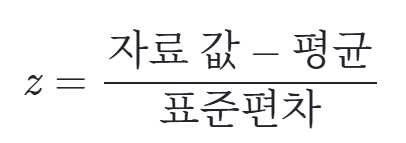
    - 양의 z-점수는 측정값이 평균보다 높음을 의미
    - 음의 z-점수는 측정값이 평균보다 낮음을 의미
    - 0에 가까운 z-점수는 측정값이 평균과 비슷함을 의미
    - z-점수가 +3이상이거나 -3이하이면 이상치로 판단한다

#### IQR 기반 이상치 탐지

In [87]:
# 등급별('Pclass')로 IQR 방식으로 이상치 탐지

for cls in sorted(df['Pclass'].unique()):
    fare_df = df[df['Pclass']== cls]

    # Q1, Q3, IQR = Q3-Q1 구하기
    Q1 = fare_df["Fare"].quantile(0.25)
    Q3 = fare_df["Fare"].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계값, lower_bound = Q1 - 1.5*IQR, upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # 이상치 필터링: lower_bound보다 작거나 upper bound보다 크면 이상치
    mask_outlier = (fare_df["Fare"] < lower_bound) | (fare_df["Fare"] > upper_bound)
    # 이상치 목록 중 'Name', 'Fare'컬럼만 추출
    outliers_df = fare_df.loc[mask_outlier, ["Name", "Fare"]]

    # 결과 출력
    print(f"== Pclass {cls}  ==")
    print(f'Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}')
    print(f'Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}')
    if outliers_df.empty:
        print("이상치 없음")
    else:
        print("이상치 비율")
        ratio = (outliers_df['Fare'].count()/fare_df.shape[0]) * 100
        print(f'이상치 비율: {ratio:.2f}' )
        print("이상치 목록")
        print(outliers_df.head(3))

    print()

== Pclass 1  ==
Q1 = 30.92, Q3 = 93.50, IQR = 62.58
Lower bound = -62.94, Upper bound = 187.36
이상치 비율
이상치 비율: 9.26
이상치 목록
                               Name      Fare
27   Fortune, Mr. Charles Alexander  263.0000
88       Fortune, Miss. Mabel Helen  263.0000
118        Baxter, Mr. Quigg Edmond  247.5208

== Pclass 2  ==
Q1 = 13.00, Q3 = 26.00, IQR = 13.00
Lower bound = -6.50, Upper bound = 45.50
이상치 비율
이상치 비율: 3.80
이상치 목록
                            Name  Fare
72          Hood, Mr. Ambrose Jr  73.5
120  Hickman, Mr. Stanley George  73.5
385    Davies, Mr. Charles Henry  73.5

== Pclass 3  ==
Q1 = 7.75, Q3 = 15.50, IQR = 7.75
Lower bound = -3.88, Upper bound = 27.12
이상치 비율
이상치 비율: 10.59
이상치 목록
                                                 Name     Fare
13                        Andersson, Mr. Anders Johan  31.2750
16                               Rice, Master. Eugene  29.1250
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  31.3875



#### Z-Score 기반 이상치 탐지

In [ ]:
for cls in sorted(df['Pclass'].unique()):
    fare_df = df[df['Pclass']== cls].copy()
    # 요금('Fare')의 평균 구하기
    mean =
    # 요금('Fare')의 표준편차 구하기
    std =
    # Z-score 구하기 : ((자료값-평균)/표준편차)
    # 'Fare_zscore' 컬럼 추가
    fare_df['Fare_zscore'] =
    #outliers_z 구하기 Z-score값의 절대값이 3이상이면 이상치
    outliers_z =
    print(f"이상치 개수는 {outliers_z.shape[0]}")
    print(outliers_z[['Pclass', 'Fare']])

Z-score 이상치 개수: 3
     Pclass      Fare
258       1  512.3292
679       1  512.3292
737       1  512.3292
Z-score 이상치 개수: 7
     Pclass  Fare
72        2  73.5
120       2  73.5
385       2  73.5
615       2  65.0
655       2  73.5
665       2  73.5
754       2  65.0
Z-score 이상치 개수: 14
     Pclass     Fare
74        3  56.4958
159       3  69.5500
169       3  56.4958
180       3  69.5500
201       3  69.5500
324       3  69.5500
509       3  56.4958
643       3  56.4958
692       3  56.4958
792       3  69.5500
826       3  56.4958
838       3  56.4958
846       3  69.5500
863       3  69.5500


### 📘 결측치 처리하기

- 결측치는 데이터를 분석할 때 반드시 처리해야 하는 값입니다
  성능이 좋은 분석 모델을 만드는 데 중요한 요소로 추가조사나
  정확한 예측으로 결측치를 채우는 것이 좋다
- 결측치를 처리하는 대표적인 방법
    - 결측치가 포함된 record를 제거하는 방법
    - 결측치가 포함된 컬럼을 제거하는 방법
    - 결측치를 특정한 값으로 채워 넣는 방법

#### 결측치 확인

In [89]:
# 컬럼별 결측치 개수: df.isnull() 결측값이 있는지 True/False로 표시
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 결측치 삭제하기
- 데이터프레임에서 필요없는 칼럼은 삭제할 수 있다
- 기본적인 삭제는 drop 메소드를 활용한다
    - df.drop(labels, axis, inplace=False)
    - labels: 삭제할 행인덱스 또는 열이름
    - axis = 1 : 열 레벨로 데이터 삭제
    - axis = 0 : 행 레벨로 데이터 삭제
    - inplace가 True이면 원본 데이터에서 지운다

In [95]:
# 'Cabin' 컬럼 삭제  - 열 레벨로 삭제후 확인하기
df.drop("Cabin", axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [98]:
# 행 레벨로 삭제, 첫번째 행 삭제
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# 'Cabin' 컬럼 삭제  - 열 레벨로 삭제, inplace=True 적용


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


#### 결측치 대체하기
- df.fillna(value, method=None, inplace=False)
- value: 0으로 대체하거나 mean(), median()등으로 대체
- method='ffill'(앞의값으로 채우기), 'bfill'
- inplace : 원본 데이터에 적용여부

In [ ]:
# Age 결측치를 median() 중앙값으로 대치
# df.info()로 결측치 처리 확인하기


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


/tmp/ipython-input-19-1552529342.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Age'].fillna(df['Age'].median, inplace=True)


### 📘 스케일링 하기
- 각 컬럼에 들어 있는 데이터의 상대적 크기에 따라 분석 결과와 모델링 결과가 달라질 수 있다
- 상대적으로 큰 숫자를 가지는 칼럼의 영향을 더 크게 반영하게 됨
- 따라서 수치형 데이터의 경우 상대적 크기 차이를 제거할 필요가 있는데
  이를 스케일링(Scaling) 이라고 한다


#### 정규화 하기
- min-max scaling은 데이터의 범위를 0~1 사이로 변환하여 데이터의 분포를 조정하는 가장 일반적인 정규화 방법이다
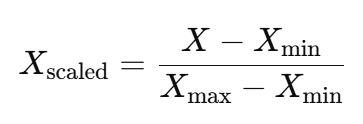

In [ ]:
# 숫자형 데이터타입 컬럼만 추출하기
# df.select_dtypes(include='number)
df_num =

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,1,0,3,1,0,7.2500
1,2,1,1,1,0,71.2833
2,3,1,3,0,0,7.9250
3,4,1,1,1,0,53.1000
4,5,0,3,0,0,8.0500


In [ ]:
# min-max scaling 구하기
df_norm =

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,0.000000,0.0,1.0,0.125,0.0,0.014151
1,0.001124,1.0,0.0,0.125,0.0,0.139136
2,0.002247,1.0,1.0,0.000,0.0,0.015469


#### 표준화 하기
- 수치형 데이터를 평균이 0이고 표준편차가 1인 표준정규분포로 변환한다
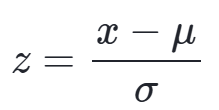


In [ ]:
# 표준화 적용하기
df_norm =

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,-1.729137,-0.788829,0.826913,0.432550,-0.473408,-0.502163
1,-1.725251,1.266279,-1.565228,0.432550,-0.473408,0.786404
2,-1.721365,1.266279,0.826913,-0.474279,-0.473408,-0.488580
3,-1.717480,1.266279,-1.565228,0.432550,-0.473408,0.420494
4,-1.713594,-0.788829,0.826913,-0.474279,-0.473408,-0.486064


### 📘 데이터 추가하기

In [ ]:
## SibSp(형제/배우자 수)와 Parch(부모/자녀 수)에 본인을 더해서
# FamilySize 컬럼을 만들기


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1


### 📘 컬럼명 변경
- DataFrame.rename(mapper=None, *, axis=None, columns=None, index=None, inplace=False)
- DataFrame에서 행 또는 열의 이름(레이블)을 변경할 때 사용

In [ ]:
# 컬럼명 변경: 'PassengerId' -> 'Passenger Id', 'Sex'->'Gender'


,Passenger Id,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1


### 📘 삭제하기
- 기본적인 삭제는 drop 메소드를 활용한다
    - df.drop(labels, axis, inplace=False)
    - labels: 삭제할 행인덱스 또는 열이름
    - axis = 1 : 열 레벨로 데이터 삭제
    - axis = 0 : 행 레벨로 데이터 삭제
    - inplace가 True이면 원본 데이터에서 지운다

In [ ]:
# 불필요한 열 'Ticket', 'PassengerId' 삭제


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1


### 📘 데이터프레임 병합하기

- pandas.concat은 여러 Series 또는 DataFrame 객체를 지정한 축(axis)을
  따라 이어 붙여 하나의 객체로 만드는 함수
- 주로 행(row)나 열(column)을 단순히 합치고 싶을때 사용한다
    - axis = 0 : 행을 기준으로 합친다 (기본값)
    - axis = 1 : 열을 기준으로 합친다
    - join, ingnore_index, keys등의 옵션으로 결합방식 제어한다
    - Ignore_index: 기존 인덱스를 유지하거나 무시
        - False: 기존 인덱스 유지
        - True: 기존 인덱스 무시(인덱스 재배열)

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(
    {'col1':['사과', '배', '감', '수박', '메론'],
     'col2':[500, 1000, 2500, 5000, 3000],
     'col3':[10, 20, 30, 40, 50]
    },
    index=[0,1,2,3,4]
)
df2 = pd.DataFrame(
    {'col1':['수박', '멜론', '딸기', '키위', '오렌지'],
     'col2':[5000, 3000, 1000, 600, 700]
    },
    index=[3,4,5,6,7]
)

In [ ]:
df1

,col1,col2,col3
0,사과,500,10
1,배,1000,20
2,감,2500,30
3,수박,5000,40
4,메론,3000,50


In [ ]:
df2

,col1,col2
3,수박,5000
4,멜론,3000
5,딸기,1000
6,키위,600
7,오렌지,700


#### 세로 방향(행추가) 병합

In [ ]:
# 기존 인덱스 유지, 병합후 없는 값은 NaN으로 채워진다
pd.concat([df1, df2] ,ignore_index=False)

,col1,col2,col3
0,사과,500,10.0
1,배,1000,20.0
2,감,2500,30.0
3,수박,5000,40.0
4,메론,3000,50.0
3,수박,5000,NaN
4,멜론,3000,NaN
5,딸기,1000,NaN
6,키위,600,NaN
7,오렌지,700,NaN


In [ ]:
# 기존 인덱스 무시 (인덱스 재배열)
pd.concat([df1, df2], ignore_index=True)

,col1,col2,col3
0,사과,500,10.0
1,배,1000,20.0
2,감,2500,30.0
3,수박,5000,40.0
4,메론,3000,50.0
5,수박,5000,NaN
6,멜론,3000,NaN
7,딸기,1000,NaN
8,키위,600,NaN
9,오렌지,700,NaN


#### 가로 방향(열 추가) 병합

In [ ]:
# axis=1, 병합후 없는 값은
pd.concat([df1, df2], axis=1)

,col1,col2,col3,col1,col2
0,사과,500.0,10.0,NaN,NaN
1,배,1000.0,20.0,NaN,NaN
2,감,2500.0,30.0,NaN,NaN
3,수박,5000.0,40.0,수박,5000.0
4,메론,3000.0,50.0,멜론,3000.0
5,NaN,NaN,NaN,딸기,1000.0
6,NaN,NaN,NaN,키위,600.0
7,NaN,NaN,NaN,오렌지,700.0


- df1과 df2가 컬럼명은 동일하지만 나란히 컬럼명들이 각각 쓰여있고
  동일한 인덱스의 경우 나란히 합쳐지고 서로 다른 인덱스의 경우
  NaN과 함께 각각 출력된다

In [ ]:
df3 = pd.DataFrame({
    'C': ['C0', 'C1', 'C2']
}, index=[0, 1, 2])

df4 = pd.DataFrame({
    'D': ['D0', 'D1', 'D2']
}, index=[0, 1, 2])

# 가로 방향 병합 (axis=1)
pd.concat([df3, df4], axis=1)

,C,D
0,C0,D0
1,C1,D1
2,C2,D2


#### 조인 방식(join) 제어

In [ ]:
# join='inner' (교집합)
# axis=0, DataFrame을 **세로 방향(행 기준)**으로 합치면서
# 공통된 열만 유지해서 합치기 (교집합 기준)
pd.concat([df1, df2], axis=0, join='inner')

,col1,col2
0,사과,500
1,배,1000
2,감,2500
3,수박,5000
4,메론,3000
3,수박,5000
4,멜론,3000
5,딸기,1000
6,키위,600
7,오렌지,700


In [ ]:
# outer (합집합)
# axis=0, DataFrame을 **세로 방향(행 기준)**으로 합치면서,
# 모든 열(column)을 보존하고 싶은 경우
pd.concat([df1, df2], axis=0, join='outer')

,col1,col2,col3
0,사과,500,10.0
1,배,1000,20.0
2,감,2500,30.0
3,수박,5000,40.0
4,메론,3000,50.0
3,수박,5000,NaN
4,멜론,3000,NaN
5,딸기,1000,NaN
6,키위,600,NaN
7,오렌지,700,NaN


In [ ]:
pd.concat([df1, df2], axis=1, join='inner')

,col1,col2,col3,col1,col2
3,수박,5000,40,수박,5000
4,메론,3000,50,멜론,3000


In [ ]:
pd.concat([df1, df2], axis=1,  join='outer')

,col1,col2,col3,col1,col2
0,사과,500.0,10.0,NaN,NaN
1,배,1000.0,20.0,NaN,NaN
2,감,2500.0,30.0,NaN,NaN
3,수박,5000.0,40.0,수박,5000.0
4,메론,3000.0,50.0,멜론,3000.0
5,NaN,NaN,NaN,딸기,1000.0
6,NaN,NaN,NaN,키위,600.0
7,NaN,NaN,NaN,오렌지,700.0


### 📘 데이터프레임 변형하기

#### Melt
- 역 pivot(unpivot)이라고도 부름
- 여러 컬럼으로 흩어져 있는 정보를 한 컬럼으로 모아 데이터가
긴(long format)이 되도록 변환한다
    - id_vars : 그대로 유지할(고정할)컬럼
    - value_vars(선택) : Melt할 컬럼 목록(지정하지 않으면 나머지 모두)
    - var_name : Melt한 컬럼명이 들어갈 새 컬럼 이름
    - value_name : Melt한 값이 들어갈 새 컬럼 이름

In [ ]:
# Wide한 데이터 프레임 생성
# 연도별(Year)로 Product_A, Product_B 판매량열로 나열된 데이터
df_wide = pd.DataFrame({
    'Year': [2020, 2021, 2022],
    'Product_A': [100, 150, 200],
    'Product_B': [80, 120, 160]
})
df_wide

,Year,Product_A,Product_B
0,2020,100,80
1,2021,150,120
2,2022,200,160


In [ ]:
# id_vars= ['Year']를 기준으로 나머지 칼럼이 Product(변수명)과
# Sales(값) 열로 long 형태로 변환된다
df_melted=df_wide.melt(id_vars=['Year'], var_name='Product', value_name='Sales')
df_melted

,Year,Product,Sales
0,2020,Product_A,100
1,2021,Product_A,150
2,2022,Product_A,200
3,2020,Product_B,80
4,2021,Product_B,120
5,2022,Product_B,160


#### pivot
- pivot은 축을 중심으로 회전한다는 사전적 의미처럼 행 데이터를 열 데이터로 회전할 수 있다.
- 긴 형태의 데이터를 "행/열" 기준으로 다시 펼쳐(wide format) 교차점값을 채워준다
    - index : 행 인덱스로 사용할 컬럼
    - columns : 컬럼 이름이 될 변수 컬럼
    - values : 교차점에 채울 값 컬럼

In [ ]:
# Year를 인덱스로, Product 값이 새로운 컬럼명이 되도록,
# Sales 값을 채워 다시 wide 형태로 복원한다
df_pivot = df_melted.pivot(index='Year', columns='Product', values='Sales')
df_pivot

Product,Product_A,Product_B
Year,,
2020,100,80
2021,150,120
2022,200,160


## 📊 탐색적 데이터 분석(EDA)

### 📕 데이터 정렬하기

In [ ]:
# sort_values(by='컬럼명', ascending=True, inplace=False)
# 칼럼명 기준으로 오름차순/내림차순 정렬
# 요금('Fare')를 기준으로 오름차순 정렬하기

sorted_df

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,815,0,1,"Fry, Mr. Richard",male,28.0,0,0,0.0000,S,1
1,806,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,0.0000,S,1
2,413,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,0.0000,S,1
3,481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,0.0000,S,1
4,302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0000,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S,6
887,341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,S,6
888,737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C,1
889,679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C,2


In [ ]:
# 'Pclass' 기준으로 오름차순으로 정렬하고 'Age' 기준으로 내림차순으로 정렬한다

df_sorted_multi[['Pclass', 'Age', 'Name']].head()

,Pclass,Age,Name
630,1,80.0,"Barkworth, Mr. Algernon Henry Wilson"
96,1,71.0,"Goldschmidt, Mr. George B"
493,1,71.0,"Artagaveytia, Mr. Ramon"
745,1,70.0,"Crosby, Capt. Edward Gifford"
54,1,65.0,"Ostby, Mr. Engelhart Cornelius"


### 📕 그룹화하기
- groupby 메소드는 데이터프레임의 같은 값을 하나로 묶어서 통계나 집계 결과를 확인하기 위해 사용한다
    - split: 그룹별로 데이터를 나눈다
    - Apply: 각 그룹별로 집계 함수를 적용한다
    - Combine: 그룹별 집계 결과를 하나로 합치는 과정이다

#### 그룹별로 분할하기: 컬럼조건에 따라 독립된 그룹으로 나누기

In [ ]:
# 티켓등급(Pclass)별로 그룹 나누기(split)

for name, group in grouped:
    print(f"====  Pclass: {name} ====")
    # 각 그룹의 상위 3개만 추출
    print(group.head(3))
    print()

====  Pclass: 1 ====
   Survived  Pclass                                               Name  \
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
6         0       1                            McCarthy, Mr. Timothy J   

      Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  
1  female  38.0      1      0  71.2833        C           2  
3  female  35.0      1      0  53.1000        S           2  
6    male  54.0      0      0  51.8625        S           1  

====  Pclass: 2 ====
    Survived  Pclass                                 Name     Sex   Age  \
9          1       2  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
15         1       2     Hewlett, Mrs. (Mary D Kingcome)   female  55.0   
17         1       2         Williams, Mr. Charles Eugene    male  28.0   

    SibSp  Parch     Fare Embarked  FamilySize  
9       1      0  30.0708        C           2  
15      0    

#### 그룹화 후 연산하기

In [ ]:
# 티켓등급(Pclass)별 요금('Fare')의 평균 구하기

fare_mean

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [ ]:
# 성별('Sex')에 따른 생존('Survived')의 평균 (생존율)

survived_by_sex

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
# 등급별/성별 생존 평균
survived_rate = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print(survived_rate)

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


#### agg()로 집계하기
- 그룹별로 여러 개의 통계나 계산을 한 번에 적용할 수 있게 해주는 핵심 기능
- 집단별 요약 통계나 패턴 분석에 매우 자주 사용
- df.groupby('컬럼명')['컬럼명'].agg('mean')
- df.groupby('컬럼명').agg({"컬럼명":["mean", "max"]})

In [ ]:
# aggregate를 사용하여 Pclass로 그룹화 후 Fare의 최대값 구하기

fare_max_by_pclass

,Fare
Pclass,
1,512.3292
2,73.5000
3,69.5500


In [ ]:
# Pclass별로 나이와 운임(fare)의 평균과 최대값을 구함

agg_result


Age             Fare          
             mean   max       mean       max
Pclass                                      
1       36.812130  80.0  84.154687  512.3292
2       29.765380  70.0  20.662183   73.5000
3       25.932627  74.0  13.675550   69.5500

In [ ]:
# 나이 구간별로 나누기
# age 60이상이면 '노인', 20이상이면 '성인',
# 13살 이상이면 '청소년', 아니면 '어린이
def age_category(age):

df_age = df.copy()
df_age['Age_Category'] = df_age['Age'].apply(age_category)
df_age[['Age', 'Age_Category']].sample(3)

,Age,Age_Category
178,30.0,성인
500,17.0,청소년
163,17.0,청소년


In [ ]:
# 나이 구간별 생존율 확인하기

age_df.head()

,Age_Category,Survived
0,노인,0.227273
1,성인,0.369565
2,어린이,0.591549
3,청소년,0.370370


### 📕 상관 관계 확인하기
- 상관관계(correlation)란 두 변수 간에 어떤 선형적(또는 순위적) 관계가 있는지를 수치로 표현한 것으로, 보통 –1에서 +1 사이의 값을 가집니다.
- df.corr()
- 두 변수 간의 선형 관계를 나타내는 값으로 값의 범위는 –1.0 ~ +1.0

    - +1에 가까울수록 “두 변수가 같은 방향으로 강하게 증가”

    - –1에 가까울수록 “한 변수가 증가할 때 다른 변수가 강하게 감소”

    - 0에 가까울수록 “선형 관계가 거의 없음”

In [ ]:
# 수치형 컬럼만 뽑아서 상관계수 계산

numeric_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
# 관심있는 컬럼만 ('Survived', 'Pclass', 'Age', 'Fare')
# 선택하여 상관관계 확인하기


# 상관계수 출력
corr

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.338481,-0.077221,0.257307
Pclass,-0.338481,1.000000,-0.369226,-0.549500
Age,-0.077221,-0.369226,1.000000,0.096067
Fare,0.257307,-0.549500,0.096067,1.000000


### 📕 교차표 확인하기
- 교차표(crosstab)는 두 범주형 데이터의 상관관계를 확인하는 방법이다
- 상호간의 관련성을 확인하고자 하는 두 특성을 가지고
  교차표를 만들어 변수 간의 관계를 확인할 수 있다

In [ ]:
# 성별과 탑승항구 관계 확인하기
pd.crosstab(df['Sex'], df['Embarked'])

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


# 🌧️장마 데이터 전처리
데이터 수집: 기상자료개방포털, 장마  https://data.kma.go.kr/climate/rainySeason/selectRainySeasonStdList.do?pgmNo=120

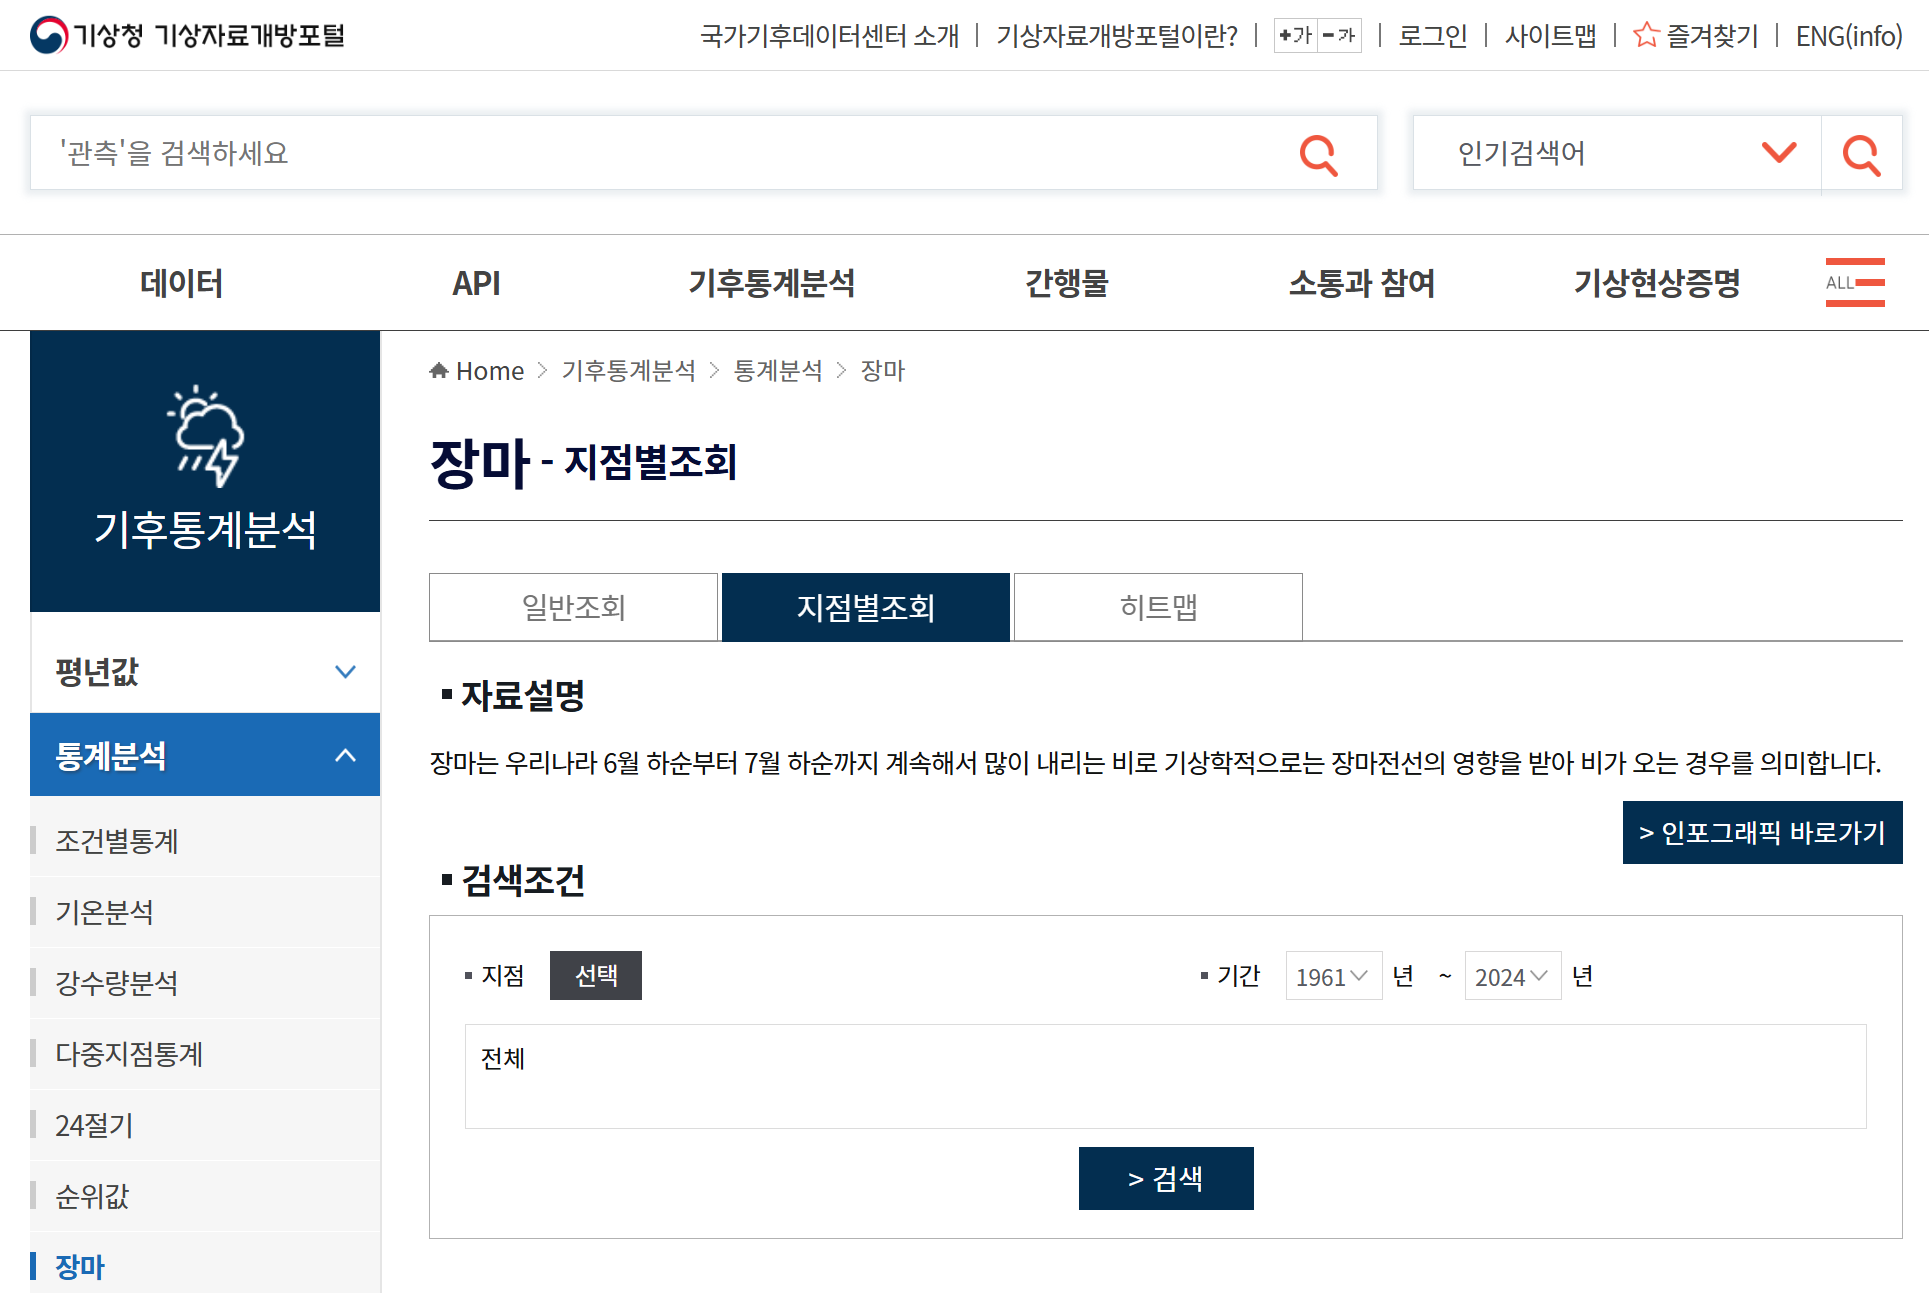

📊 데이터셋
- 1961년부터 2024년까지 장마 기간 동안의 전국 기상 관측 정보를 담고 있다

💡 데이터 컬럼 설명:
- 지점번호	기상 관측소의 고유 번호 (정수형)
- 지점명	기상 관측소 이름 (문자형)
- 시작일	장마 시작 날짜 (문자형 날짜 포맷)
- 종료일	장마 종료 날짜 (문자형 날짜 포맷)
- 장마일수	해당 기간 동안의 장마 일수 (정수형)
- 강수일수	비가 온 날의 수 (정수형)
- 합계강수량	해당 장마 기간 동안 누적된 강수량 (실수형, 일부 결측치 존재)

## 📂 데이터 불러오기

In [100]:
# from google.colab import files
#  "STCS_장마_20250617211345.csv"
filename = "data/STCS_장마_20250617211345.csv"

- pd.read_csv(filename, encoding='cp949')
- encoding은 컴퓨터가 읽을 수 있는 바이트 형태로 변환
- utf-8 → 국제 표준, 대부분의 시스템과 웹에서 사용
- cp949 → Windows 한국어(한글) 인코딩
- euc-kr → cp949와 유사하지만 문자 범위가 더 좁음

In [103]:
import pandas as pd

# 장마 데이터 읽어 오기
df = pd.read_csv(filename, encoding="cp949")
df.head()

,지점번호,지점명,시작일,종료일,장마일수,강수일수,합계강수량
0,90,속초,1961-06-29,1961-07-14,16,0,NaN
1,95,철원,1961-06-29,1961-07-14,16,0,NaN
2,100,대관령,1961-06-29,1961-07-14,16,0,NaN
3,101,춘천,1961-06-29,1961-07-14,16,0,NaN
4,105,강릉,1961-06-29,1961-07-14,16,11,49.8


## 데이터 살펴보기

In [104]:
# 데이터 프레임의 크기 (행과 열)
df.shape

(4151, 7)

In [110]:
# 데이터 프레임 정보 확인하기
df.info

<bound method DataFrame.info of       지점번호  지점명         시작일         종료일  장마일수  강수일수  합계강수량
0       90   속초  1961-06-29  1961-07-14    16     0    NaN
1       95   철원  1961-06-29  1961-07-14    16     0    NaN
2      100  대관령  1961-06-29  1961-07-14    16     0    NaN
3      101   춘천  1961-06-29  1961-07-14    16     0    NaN
4      105   강릉  1961-06-29  1961-07-14    16    11   49.8
...    ...  ...         ...         ...   ...   ...    ...
4146   226   보은  2024-06-29  2024-07-27    29    20  561.4
4147   232   천안  2024-06-29  2024-07-27    29    22  566.0
4148   235   보령  2024-06-29  2024-07-27    29    18  592.4
4149   236   부여  2024-06-29  2024-07-27    29    22  541.8
4150   238   금산  2024-06-29  2024-07-27    29    19  597.9

[4151 rows x 7 columns]>

In [108]:
# 데이터 컬럼 별 요약 통계량을 나타낸다
df.describe()

,지점번호,장마일수,강수일수,합계강수량
count,4151.000000,4151.000000,4151.000000,3563.000000
mean,195.670923,31.234401,15.005782,360.363514
std,62.462801,8.536088,8.139149,193.615999
min,90.000000,6.000000,0.000000,8.500000
25%,138.000000,27.000000,11.000000,223.150000
50%,192.000000,32.000000,16.000000,331.800000
75%,248.000000,37.000000,21.000000,466.750000
max,295.000000,54.000000,39.000000,1337.600000


## ⚙️ 데이터 전처리 하기

In [111]:
# datetime 타입으로 '시작일' 변경하기
df["시작일"] = pd.to_datetime(df["시작일"])

# 연도 컬럼 추가하기
df["연도"] = df["시작일"].dt.year

# 앞 3개행 확인하기
df.head(3)

,지점번호,지점명,시작일,종료일,장마일수,강수일수,합계강수량,연도
0,90,속초,1961-06-29,1961-07-14,16,0,NaN,1961
1,95,철원,1961-06-29,1961-07-14,16,0,NaN,1961
2,100,대관령,1961-06-29,1961-07-14,16,0,NaN,1961


In [120]:
# 컬럼별 결측치 확인하기a
df.isnull().sum()

지점번호     0
지점명      0
시작일      0
종료일      0
장마일수     0
강수일수     0
합계강수량    0
연도       0
dtype: int64

In [116]:
# '합계강수량' 평균 계산
mean_value = df["합계강수량"].mean()

In [117]:
# '합계강수량'결측치를 평균으로 대체
df['합계강수량'] = df["합계강수량"].fillna(mean_value)

In [118]:
# 결측치 평균으로 처리된 정보 확인하기
df.head()

,지점번호,지점명,시작일,종료일,장마일수,강수일수,합계강수량,연도
0,90,속초,1961-06-29,1961-07-14,16,0,360.363514,1961
1,95,철원,1961-06-29,1961-07-14,16,0,360.363514,1961
2,100,대관령,1961-06-29,1961-07-14,16,0,360.363514,1961
3,101,춘천,1961-06-29,1961-07-14,16,0,360.363514,1961
4,105,강릉,1961-06-29,1961-07-14,16,11,49.800000,1961


## 📊 탐색적 데이터 분석(EDA)

### 📕 강수 일수가 가장 길었던 년도는?

In [123]:
# 연도별 강수 일수 평균 구하기
avg_rainy_days = df.groupby("연도")["강수일수"].mean().reset_index()
print(avg_rainy_days.head(3))
print(avg_rainy_days.tail(3))

     연도      강수일수
0  1961  2.469697
1  1962  3.166667
2  1963  4.575758
      연도       강수일수
61  2022  16.757576
62  2023  22.151515
63  2024  21.378788


In [125]:
# 연도별 강수일수 기준 내림차순으로 정렬하기
avg_rainy_days = avg_rainy_days.sort_values(by="강수일수", ascending=False)
# 강수일수 평균이 많은 연도 상위 10개 추출
top10_rainy_years = avg_rainy_days.head(10)
# 데이터프레임 확인하기
top10_rainy_years

,연도,강수일수
59,2020,28.590909
45,2006,26.787879
52,2013,24.484848
30,1991,23.196970
29,1990,22.863636
13,1974,22.863636
42,2003,22.318182
62,2023,22.151515
19,1980,21.545455
63,2024,21.378788


In [136]:
# '연도'별 '강수일수' 최대값 구하기
max_rainy_days = df.groupby('연도')['강수일수'].max().reset_index()
max_rainy_days.head(3)

,연도,강수일수
0,1961,14
1,1962,19
2,1963,28


In [137]:
# 강수일수 기준 내림차순으로 정렬하기
max_rainy_days = df.groupby("연도")["강수일수"].max().reset_index()
# 강수일수 최대값 많은 연도 상위 10개 추출
top10_max_rainy_days = max_rainy_days.head(10)
# 확인하기
top10_max_rainy_days

,연도,강수일수
0,1961,14
1,1962,19
2,1963,28
3,1964,17
4,1965,26
5,1966,30
6,1967,18
7,1968,19
8,1969,36
9,1970,27


### 📕 강수 일수가 많았던 지역은?

In [131]:
#전국 강수일수 Top 10지점
# 지점별 강수일수 평균 구하기
station_rainy_days = max_rainy_days.sort_values(by="강수일수", ascending=False)
# 강수일수 많은 top10 지점
top10_station_rainy_days = max_rainy_days.head(10)
# 데이터 확인하기
top10_station_rainy_days

,연도,강수일수
0,1961,14
1,1962,19
2,1963,28
3,1964,17
4,1965,26
5,1966,30
6,1967,18
7,1968,19
8,1969,36
9,1970,27


### 📕 합계 강수량이 가장 많았던 해는?

In [139]:
# 연도별 합계 강수량 평균 구하기
year_rain_avg = df.groupby("연도")["합계강수량"].mean().reset_index()
# 내림 차순 정렬하기
year_rain_avg = year_rain_avg.sort_values(by="합계강수량", ascending=False)
# 상위 10개 년도 구하기
top10_year_rains = year_rain_avg.head(10)
# 합계강수량 상위 10개 년도 확인하기
top10_year_rains

,연도,합계강수량
45,2006,697.336364
59,2020,689.642424
62,2023,648.903030
50,2011,593.463636
26,1987,574.325061
48,2009,552.228788
42,2003,530.957576
29,1990,507.739394
63,2024,477.431818
17,1978,461.218858


### 📕 합계 강수량이 많은 지점은?

In [140]:
# 지점별 합계 강수량 평균 구하기
station_rain_avg = df.groupby("지점명")["합계강수량"].mean().reset_index()
# 합계 강수량 기준 내림차순 정렬하기
station_rain_avg = station_rainy_days.sort_values(by="합계강수량", ascending=False)
# 지점별 합계강수량 상위 10개 지역
top10_station_rain_avg = station_rainy_days.head(10)
# 합계강수량 상위 10개 지점 확인하기
top10_station_rain_avg

KeyError: '합계강수량'

In [ ]:
# 지점별 '장마일수', '합계강수량' 표준편차 구하기
agg_std_by_station =
# '합계강수량' 표준 편차 큰 10개지점 구하기
top10_std_by_rains =
top10_std_by_rains

,지점명,장마일수,합계강수량
27,서울,8.866612,241.151981
58,춘천,8.866612,233.774284
65,홍천,8.829021,228.917842
25,서귀포,8.582336,224.397487
51,제천,8.829021,222.508834
32,양평,8.829021,221.096681
21,부산,8.419318,215.494967
2,거제,8.410288,208.000202
11,남해,8.410288,207.904647
42,이천,8.829021,201.635754


### 📕전라북도 장마 데이터 분석

In [142]:
# 전라북도 주요 지점명
jeonbuk_stations = ['전주', '군산','부안', '임실', '정읍', '남원', '장수' ]
# 전라북도 지점인 데이터만 추출 ( isin() )
jeonbuk_df = df[df["지점명"].isin(jeonbuk_stations)]
# 인덱스 초기화, jeonbuk_df값 변경

# 상위 3개 행 확인하기
jeonbuk_df.head(3)

,지점번호,지점명,시작일,종료일,장마일수,강수일수,합계강수량,연도
17,140,군산,1961-06-29,1961-07-12,14,0,360.363514,1961
19,146,전주,1961-06-29,1961-07-12,14,14,264.400000,1961
45,243,부안,1961-06-29,1961-07-12,14,0,360.363514,1961


In [144]:
# 전라북도 지점별 합계강수량 평균 구하기
rainfall_by_station = jeonbuk_df.groupby("지점명")["합계강수량"].mean().reset_index()
rainfall_by_station

,지점명,합계강수량
0,군산,349.124134
1,남원,382.808631
2,부안,341.712650
3,임실,366.933961
4,장수,400.177223
5,전주,359.434375
6,정읍,345.868387


### 📕 전라북도 지역에서 강수량이 가장 많은 지역은?

In [ ]:
# 전라북도 지역 합계 강수량 내림차순 정렬
rainfall_by_station = rainfall_by_station.sort_values(by="합계강수량", ascending=False)
rainfall_by_station

,지점명,합계강수량
4,장수,400.177223
1,남원,382.808631
3,임실,366.933961
5,전주,359.434375
0,군산,349.124134
6,정읍,345.868387
2,부안,341.712650


In [ ]:
# 전라북도 연도별 지점별 '합계강수량' 평균 구하기
yearly_rainfall = jeonbuk_df.groupby(["연도", "지점명"]
)["합계강수량"].mean().reset_index()
# 내림차순 정렬
yearly_rainfall = yearly_rainfall.sort_values(by="합계강수량", ascending=False)
# 상위 5개 보여주기
yearly_rainfall.head(5)

,연도,지점명,합계강수량
425,2023,장수,1093.4
421,2023,군산,993.5
427,2023,정읍,929.6
424,2023,임실,902.8
423,2023,부안,889.4
